In [116]:
import pandas as pd
import numpy as np
import gc

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [117]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [118]:
plt.style.use(['default'])
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    'font.size': 12, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'figure.facecolor':'white',
    'font.family': 'serif',
}
plt.rcParams.update(params)

### Read data

In [119]:
dftrain = pd.read_csv('../data/train.csv')
dftest = pd.read_csv('../data/test.csv')

## Exploratory Data Analysis

### 1. Get domain knowledge

In [41]:
print('Train:\n')
print('Number of rows: {}\nNumber of columns: {}\n'.format(dftrain.shape[0], dftrain.shape[1]))
print('Test:\n')
print('Number of rows: {}\nNumber of columns: {}'.format(dftest.shape[0], dftest.shape[1]))

Train:

Number of rows: 4459
Number of columns: 4993

Test:

Number of rows: 49342
Number of columns: 4992


In [43]:
pd.merge(dftrain.dtypes.sort_values().to_frame('feature_type').groupby('feature_type').size().to_frame('train_count').reset_index(),
         dftest.dtypes.sort_values().to_frame('feature_type').groupby('feature_type').size().to_frame('test_count').reset_index(),
         on='feature_type', how='outer')

,feature_type,train_count,test_count
0,int64,3147,NaN
1,float64,1845,4991.0
2,object,1,1.0


In [44]:
dftrain.head(5)

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3697

In [45]:
dftest.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,e90ed19da,c4d38135f,968b01ca3,26b423c42,0656586a4,b4ced4b7a,0b8e10df6,603e85eb7,605728195,4e8196700,f115e74c0,9ca0eee11,472cd130b,ee7e4581d,3e0e55648,a939664aa,b0f5ed414,a72e0bf30,e662f1672,54b1c1bc0,ec1425047,78a879b5d,bd550871c,828b327a6,3268914c7,21e0e6ae3,ec73030f6,c5b30277a,c16a7d537,64534cc93,bd6671d31,0f8d7b98e,aab0aeb4b,9a9b4a012,8367dfc36,251d1aa17,92e056c5c,c377b9acf,e0f6a993a,f3e544d66,0cb171797,80c0c9910,9f8df01bd,0a69cc2be,563d2f09a,963a49cdc,7ee833549,7b58c8e37,cde9c35e8,587a5d8c3,408d191b3,42fdff3a0,1e8801477,3770cb9fa,133714358,15dba7177,604ac0633,cbf34125e,4563c7ee5,c679b0013,93f686d09,8e7a80f64,e034322f0,60cb16e88,9d435a85b,73a32cd05,29eddc376,d8fa4d098,ef6fab1bc,1de1fda2c,665493ecc,ad207f7bb,e7620cba2,d40eb2705,5d26f4d92,fd206ec4d,19a4e3e16,e975d3be7,0564ff72c,bd7e6d2af,4e86dd8f3,2127bb611,59dfc16da,2f92a1a45,63f968fa6,312832f30,6679fe54f,9f05b2279,dd2fc27b0,af1d28337,26b260c2b,7207afb67,4a3248e89,4b6c549b1,f402f59ff,a75d400b8,8b6ae05dc,d318bea95,35da68abb,4e98771c9,72505ebb2,1a6d866d7,13bc4dacc,851697562,6f29fbbc7,593d5a082,eef3f5c49,b495b7492,46dafc868,ddd416fe0,256f1449f,e059a8594,c40750aed,22a123588,5502d45f5,beb7f98fd,503de0024,68891097e,6035df6d8,7eacd712f,99f466457,701aaedab,6fec5a793,fe0dd1a15,c035b5d2d,1fb62e0dc,f7faf2d9f,ffb34b926,bc2bf3bcd,025dea3b3,e700276a2,b5ad8afe0,52695ed4a,530e9b9b8,68a945b18,90db65912,d6033b6eb,4ea447064,018d6afbb,f9db72cff,4b336f62e,99197edf2,526ed2bec,77eb013ca,9dbb6b717,bf6f90180,94e87cc26,186b87c05,ed0860a34,bd16de4ba,fcab1682f,55d7eb6d2,0e1f6696a,49db469f5,1e6040658,f99a09543,0c4bf4863,7d182d05c,ae41a98b6,2a933bcb8,adc70e02f,1520de553,ea21d2722,dd0491aad,7210546b2,188e8ca61,50640c29c,8e028d2d2,b728093e6,607a7b8f0,2991c6c02,eb4dc2cdf,3ccc39318,b4e4a184a,90b0ed912,c38ca8ae3,...,69900c0d1,65b3354f4,a9819bda9,09bf8b0cf,d30bbe129,8b1379b36,f333a5f60,05c9b6799,a8e607456,c1543c985,76e092b8c,3d390e8b9,77f5250e3,83dbedc24,e04141e42,2252c7403,7dad769a6,c47340d97,f08c20722,10776252b,2c339d4f2,51d5e73a8,930f989bf,01816048b,29f828a0f,0a26a3cfe,b4e462a2f,ce549c005,9db026fcf,c906cd268,fb9e07326,67f9e982f,ffec49dae,c24634d56,6931ed626,ffa45bf70,1b7ec860b,2a6e64bb9,28bc37378,8c61bede6,98082c8ef,324e49f36,2c97120d8,d196ca1fd,e838549ac,fb32c00dc,d279be266,cb71f66af,066566b35,2d29edb0a,87a91f998,015c3e354,8d0774750,1847c8140,b850c3e18,f0aec6c6b,ae3aa1abd,b6946d764,dd771cb8e,e1121cd3e,6249d8488,2cb73ede7,ac37543df,adf357c9b,5089bf842,b8fde5765,c0f8422e1,593cccdab,b200c8b4a,2d065b147,762cbd0ab,bfc7c09df,735ea6729,b0310a768,857020d0f,0743b9c08,3ac1ba8f9,ddea5dc65,df221f22b,e592c0185,759c9e85d,a72fcabd8,95ba53cf8,2731a96a2,c0f5174c7,a3fb07bfd,1010d7174,afc08501b,89e7dcacc,1bf1406eb,ee0b53f05,defcc2c50,14d1d798e,a8e562e8e,ebf53ab7c,6b142730f,b8f892930,4d1f9e4d7,15e8d7f53,683d89bf1,9ed0e6ddb,f6c436744,2a7ac8010,4bd1722dc,ea26c7fe6,323fd38a8,eb6bb7ce1,78f45daba,46c525541,310e1ede9,c03c8799c,c7ae29e66,96f5cf98a,24141fd90,fe919be32,daedcafad,e79e5f72c,5beff147e,086c13b6c,52b347cdc,ff1551a48,c8fdf5cbf,cac875244,4c7768bff,8bde3e628,3685524f4,4fe67672e,4634c8fae,f7f553aea,9abffd22c,2dbeac1de,a396ceeb9,56ec098a1,ba4a02efc,896d1c52d,1f8754c4e,ed5af35f0,41d1e5f8f,259169df2,4600aadcf,13f3a3d19,2123a2089,e43343256,f928893ca,acc4a8e68,e9a473fbb,a3382e205,4dcf81d65,7f38dafa6,6fa0b9dab,e3

#### Target price statistics and distributions

In [46]:
dftrain.target.describe().to_frame().reset_index()

,index,target
0,count,4.459000e+03
1,mean,5.944923e+06
2,std,8.234312e+06
3,min,3.000000e+04
4,25%,6.000000e+05
5,50%,2.260000e+06
6,75%,8.000000e+06
7,max,4.000000e+07


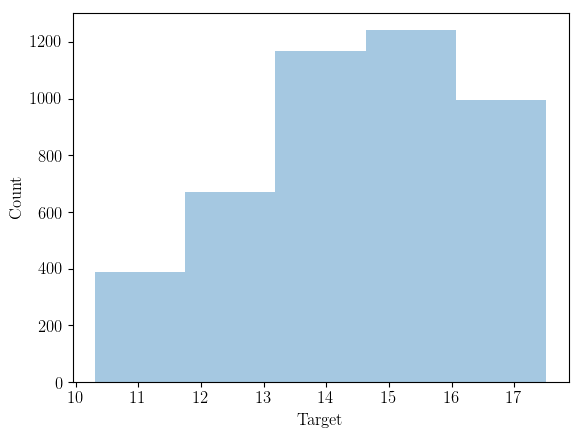

In [47]:
sns.distplot(np.log(dftrain.target), bins= 5, kde = False)
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

### 2. Clean data

#### Remove missing rows/features

In [120]:
print(dftrain.isnull().sum(axis = 0).to_frame('count').groupby('count').size())
print(dftest.isnull().sum(axis = 0).to_frame('count').groupby('count').size())

count
0    4993
dtype: int64
count
0    4992
dtype: int64


#### Remove constant features

In [121]:
def find_constant_features(dataFrame):
    features_to_remove = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            features_to_remove.append(column)
    return features_to_remove

In [122]:
features_to_remove = find_constant_features(dftrain)

In [123]:
target = dftrain.target
dftrain.drop(['target'], axis = 1, inplace = True)
features_to_remove.append('ID')

dftrain.drop(features_to_remove, axis = 1, inplace = True)
dftest.drop(features_to_remove, axis = 1, inplace = True)

In [124]:
print(dftrain.shape)
print(dftest.shape)

(4459, 4735)
(49342, 4735)


#### Remove Duplicate rows

In [125]:
## With the help from :
## https://www.kaggle.com/samratp/lightgbm-xgboost-catboost

def duplicate_columns(frame):
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []

    for t, v in groups.items():

        cs = frame[v].columns
        vs = frame[v]
        lcs = len(cs)

        for i in range(lcs):
            ia = vs.iloc[:,i].values
            for j in range(i+1, lcs):
                ja = vs.iloc[:,j].values
                if np.array_equal(ia, ja):
                    dups.append(cs[i])
                    break

    return dups

In [126]:
duplicate_cols = duplicate_columns(dftrain)

In [127]:
duplicate_cols

['34ceb0081', '8d57e2749', '168b3e5bc', 'a765da8bc', 'acc5b709d']

In [128]:
dftrain.drop(duplicate_cols, axis = 1, inplace = True)
dftest.drop(duplicate_cols, axis = 1, inplace = True)

## Feature Engineering

#### Features mean plot

In [17]:
train_mean = dftrain.mean(axis = 0).to_frame('train_mean').sort_values(by = ['train_mean'])
test_mean = dftest.mean(axis = 0).to_frame('test_mean').sort_values(by = ['test_mean'])

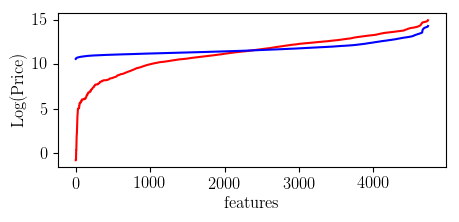

In [20]:
plt.figure(figsize = (5, 2))
plt.plot(np.log(list(train_mean['train_mean'])), 'r-')
plt.plot(np.log(list(test_mean['test_mean'])), 'b-')

plt.ylabel('Log(Price)')
plt.xlabel('features')
plt.show()

## Model building

#### Single model

In [129]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [130]:
ytrain = np.log1p(target.values)
xtrain, xval, ytrain, yval = train_test_split(dftrain, ytrain, test_size = 0.2, random_state = 2018)

In [131]:
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.005,
        "max_depth" : 5,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "seed": 42
    }
    
lgtrain = lgb.Dataset(xtrain, label = ytrain)
lgval = lgb.Dataset(xval, label = yval)
evals_result = {}

model = lgb.train(params, lgtrain, 8000, 
                  valid_sets=[lgtrain, lgval], 
                  early_stopping_rounds = 100, 
                  verbose_eval = 150, 
                  evals_result=evals_result)

Training until validation scores don't improve for 100 rounds.
[150]	training's rmse: 1.55889	valid_1's rmse: 1.63863
[300]	training's rmse: 1.46032	valid_1's rmse: 1.56862
[450]	training's rmse: 1.39477	valid_1's rmse: 1.53163
[600]	training's rmse: 1.35093	valid_1's rmse: 1.51016
[750]	training's rmse: 1.31859	valid_1's rmse: 1.49527
[900]	training's rmse: 1.2942	valid_1's rmse: 1.48552
[1050]	training's rmse: 1.27408	valid_1's rmse: 1.47919
[1200]	training's rmse: 1.25585	valid_1's rmse: 1.47379
[1350]	training's rmse: 1.23957	valid_1's rmse: 1.47006
[1500]	training's rmse: 1.22597	valid_1's rmse: 1.46675
[1650]	training's rmse: 1.21307	valid_1's rmse: 1.46439
[1800]	training's rmse: 1.20082	valid_1's rmse: 1.46229
[1950]	training's rmse: 1.18865	valid_1's rmse: 1.46105
[2100]	training's rmse: 1.17651	valid_1's rmse: 1.45946
[2250]	training's rmse: 1.1647	valid_1's rmse: 1.45819
[2400]	training's rmse: 1.1538	valid_1's rmse: 1.45672
[2550]	training's rmse: 1.14345	valid_1's rmse: 1.

In [132]:
predy = np.expm1(model.predict(xval, num_iteration=model.best_iteration))

In [133]:
length = 20
pd.DataFrame(np.column_stack(
                        [predy[0:length], 
                         np.expm1(yval[0:length]), 
                         np.absolute(predy[0:length] - np.expm1(yval[0:length]))]), 
             columns = ['predictions', 'validations', 'difference'])

,predictions,validations,difference
0,4.000542e+06,2000000.00,2.000542e+06
1,1.217317e+06,127142.86,1.090174e+06
2,2.012096e+06,4667333.34,2.655238e+06
3,2.352412e+06,2779666.66,4.272550e+05
4,8.741766e+05,4200000.00,3.325823e+06
5,2.997830e+06,10000000.00,7.002170e+06
6,1.886367e+06,600000.00,1.286367e+06
7,6.275896e+06,8680000.00,2.404104e+06
8,1.690244e+06,1000000.00,6.902441e+05
9,1.846097e+06,2000000.00,1.539032e+05


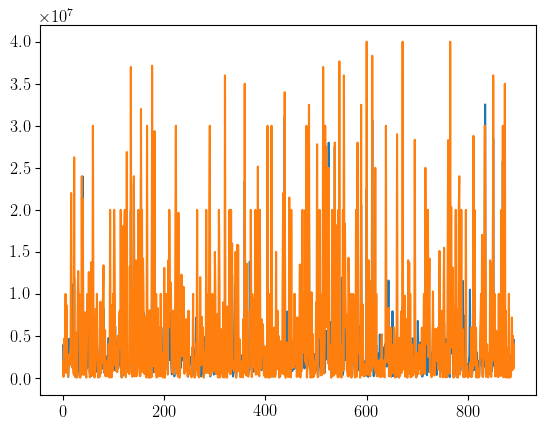

In [88]:
plt.plot(predy)
plt.plot(np.expm1(yval))
plt.show()

### Test prediction

In [134]:
print(dftest.shape)
print(dftrain.shape)

(49342, 4730)
(4459, 4730)


In [135]:
dftest.columns

Index(['48df886f9', '0deb4b6a8', '34b15f335', 'a8cb14b00', '2f0771a37',
       '30347e683', 'd08d1fbe3', '6ee66e115', '20aa07010', 'dc5a8f1d8',
       ...
       '3ecc09859', '9281abeea', '8675bec0b', '3a13ed79a', 'f677d4d13',
       '71b203550', '137efaa80', 'fb36b89d9', '7e293fbaf', '9fc776466'],
      dtype='object', length=4730)

In [136]:
pred_test = np.expm1(model.predict(dftest, num_iteration= model.best_iteration))

In [139]:
pred_test

array([1641755.85890542, 1910073.71880979, 1736602.42683491, ...,
       1412681.00763127,  890243.51978713, 1964911.99377865])

#### Ensemble Model

### Submission

In [110]:
sub = pd.read_csv('../data/sample_submission.csv')

In [137]:
sub["target"] = pred_test

In [140]:
sub.head()

,ID,target
0,000137c73,1.641756e+06
1,00021489f,1.910074e+06
2,0004d7953,1.736602e+06
3,00056a333,4.669838e+06
4,00056d8eb,1.964912e+06


In [141]:
sub.to_csv('first_submission.csv', index=False)